# Convolution Neural Nets (CNN)

In [1]:
import torch
from torch import nn, optim

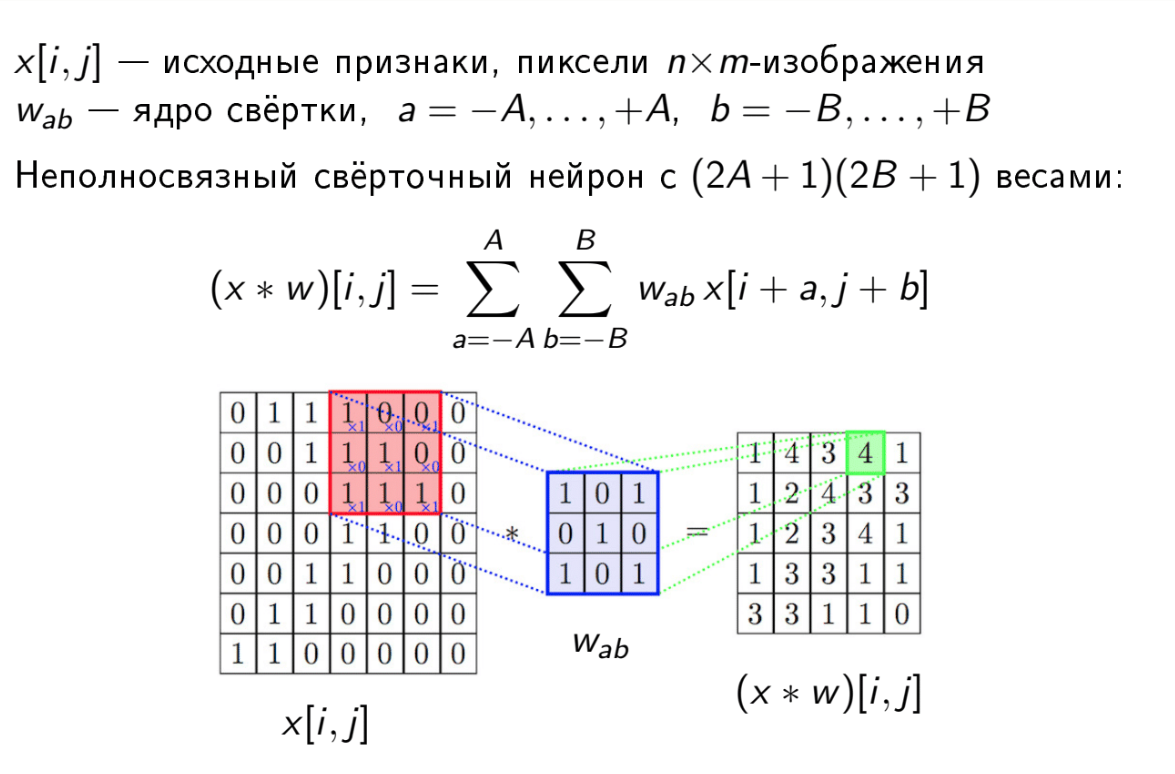

In [12]:
torch.arange(36, dtype=torch.float).reshape((1,3,3,4))

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],

         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]],

         [[24., 25., 26., 27.],
          [28., 29., 30., 31.],
          [32., 33., 34., 35.]]]])

In [15]:
l = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(2,2))

l(torch.arange(36, dtype=torch.float).reshape((1,3,3,4)))

tensor([[[[ 18.1646,  18.5925,  19.0203],
          [ 19.8759,  20.3038,  20.7316]],

         [[  9.9247,  10.2706,  10.6166],
          [ 11.3085,  11.6544,  12.0004]],

         [[ -7.0257,  -7.7601,  -8.4946],
          [ -9.9634, -10.6978, -11.4323]],

         [[ 12.5812,  12.7593,  12.9374],
          [ 13.2936,  13.4717,  13.6498]],

         [[ 16.3164,  17.2298,  18.1432],
          [ 19.9700,  20.8834,  21.7968]]]], grad_fn=<ThnnConv2DBackward>)

![](img/conv.gif)

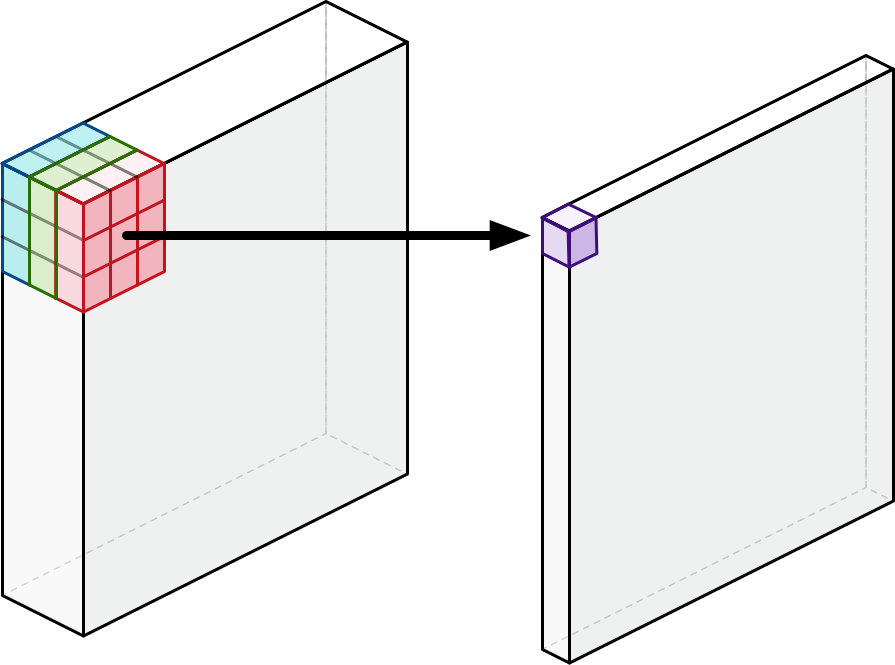

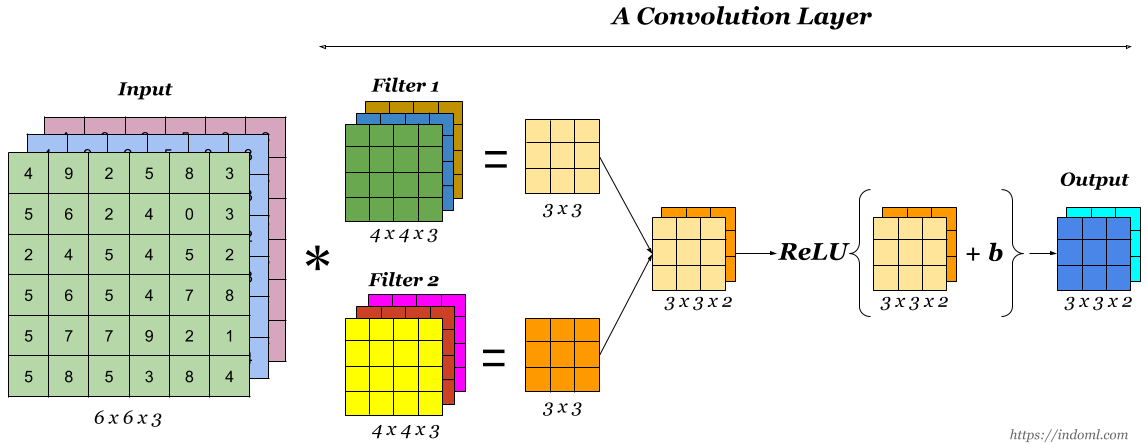

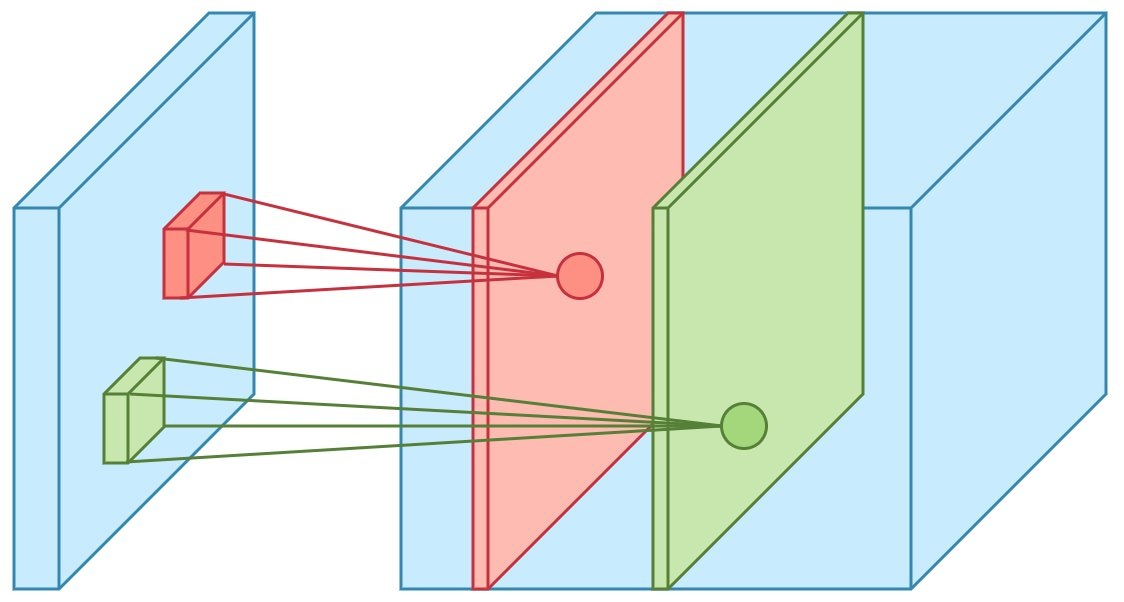

## Padding

### no padding
![img](img/no_padding.gif)



### half padding

![](img/small_padding1.gif)



### full padding

![](img/full_padding.gif)

In [16]:

nn.Conv2d(
    in_channels=3,
    out_channels=2,
    kernel_size=(5,3), 
    padding=2, 
    stride=2
)

l = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(2,2))

l(torch.arange(36, dtype=torch.float).reshape((1,3,3,4)))

tensor([[[[ 12.1892,  12.4713,  12.7534],
          [ 13.3177,  13.5998,  13.8819]],

         [[  6.8006,   7.4509,   8.1012],
          [  9.4018,  10.0521,  10.7024]],

         [[-11.0025, -11.7687, -12.5350],
          [-14.0675, -14.8337, -15.6000]],

         [[ -7.8332,  -7.5597,  -7.2861],
          [ -6.7391,  -6.4655,  -6.1920]],

         [[  9.3699,   9.6887,  10.0075],
          [ 10.6451,  10.9639,  11.2826]]]], grad_fn=<ThnnConv2DBackward>)

## Strides

Будем брать свертки с каким-то шагом

![](img/no_padding_strides.gif)

![](img/padding_strides.gif)

Есть еще dilated convolution - берем пиксели не подряд, а через несколько

![](img/dilation.gif)

## А в реальности это все матричное перемножение

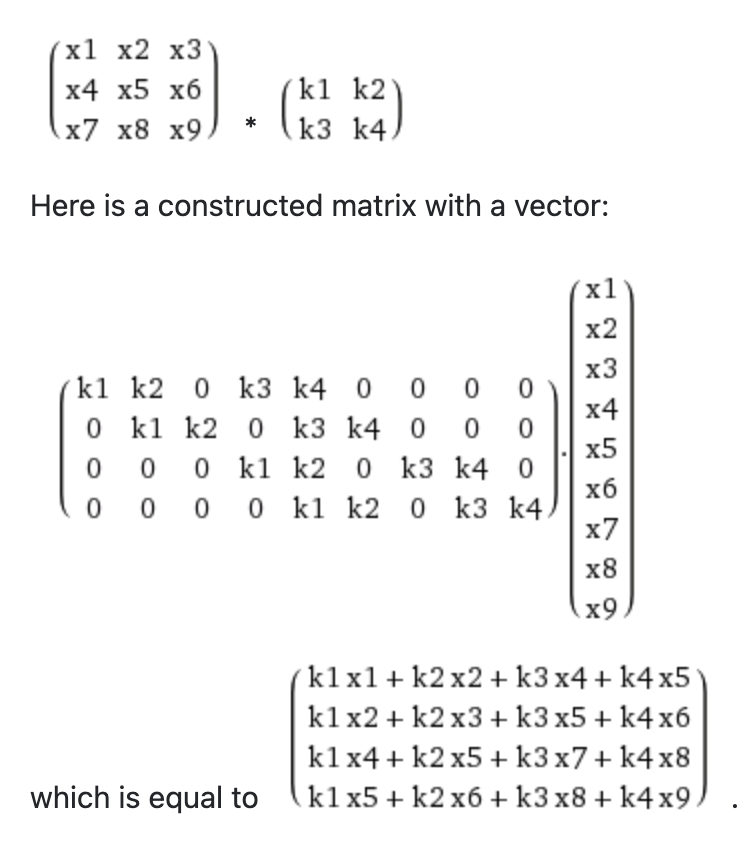

In [11]:
Image('images/conv2d_to_linear.png', width=400)

[Ссыль](https://github.com/vdumoulin/conv_arithmetic)

# Pooling

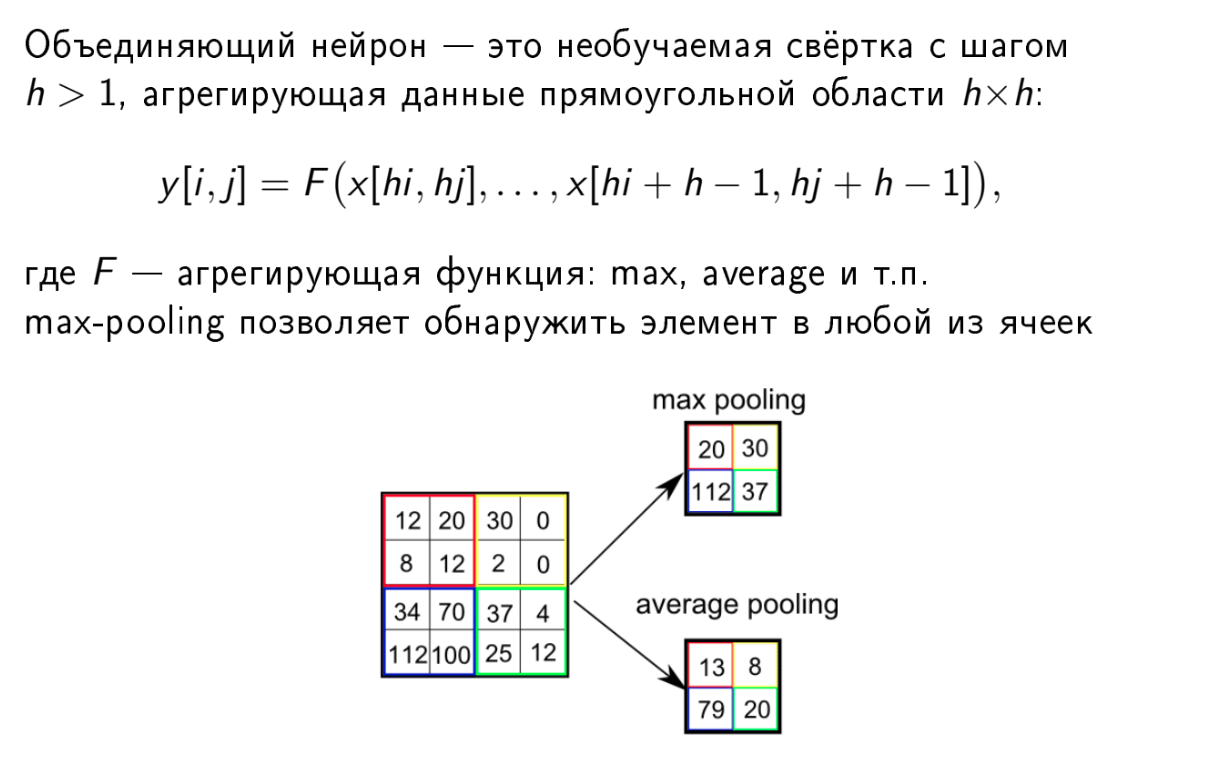

In [17]:
x = torch.tensor([[[12,20,30, 0],
                  [ 8,12, 2, 0],
                  [34,70,37, 4],
                [112,100,25,12]]], dtype=float)
print(x.size())
print(nn.MaxPool2d(kernel_size=(2,2))(x))
print(nn.AvgPool2d(kernel_size=(2,2))(x))

torch.Size([1, 4, 4])
tensor([[[ 20.,  30.],
         [112.,  37.]]], dtype=torch.float64)
tensor([[[13.0000,  8.0000],
         [79.0000, 19.5000]]], dtype=torch.float64)


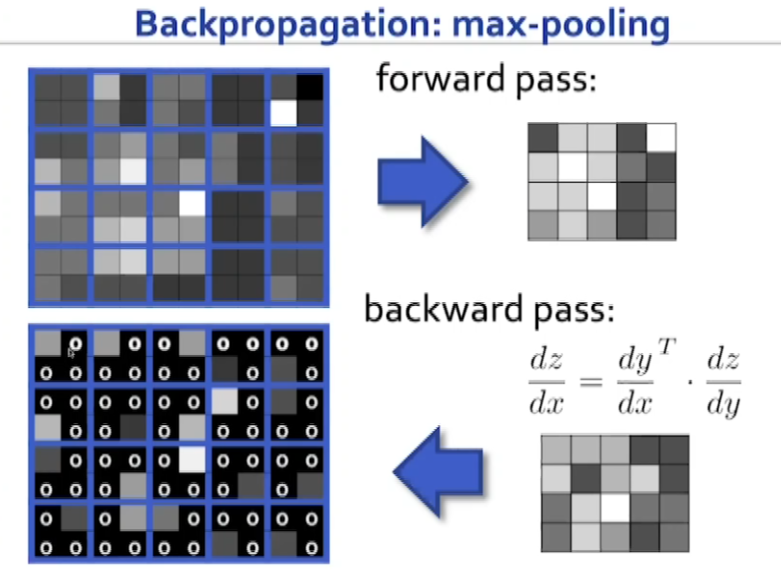

# CNN

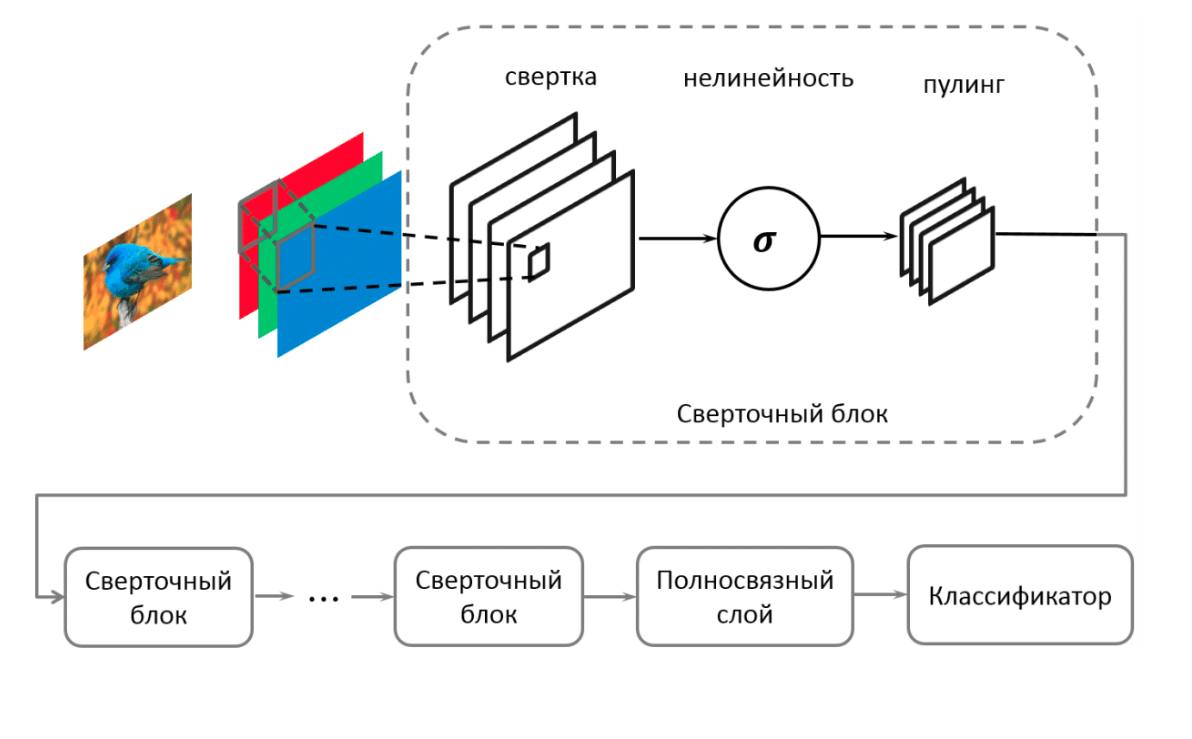

In [8]:
def block(cin=1, cout=3, kernel_size=(3,3), padding=(1,1), stride=(1,1), pool_size=(2,2)):
    return nn.Sequential(
        nn.Conv2d(in_channels=cin, 
                  out_channels=cout, 
                  kernel_size=kernel_size, 
                  padding=padding, 
                  stride=stride), #cin x H(4) x W(4)
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=pool_size)
    )

x = torch.tensor([[[12,20,30, 0],
                  [ 8,12, 2, 0],
                  [34,70,37, 4],
                [112,100,25,12]]], dtype=float)


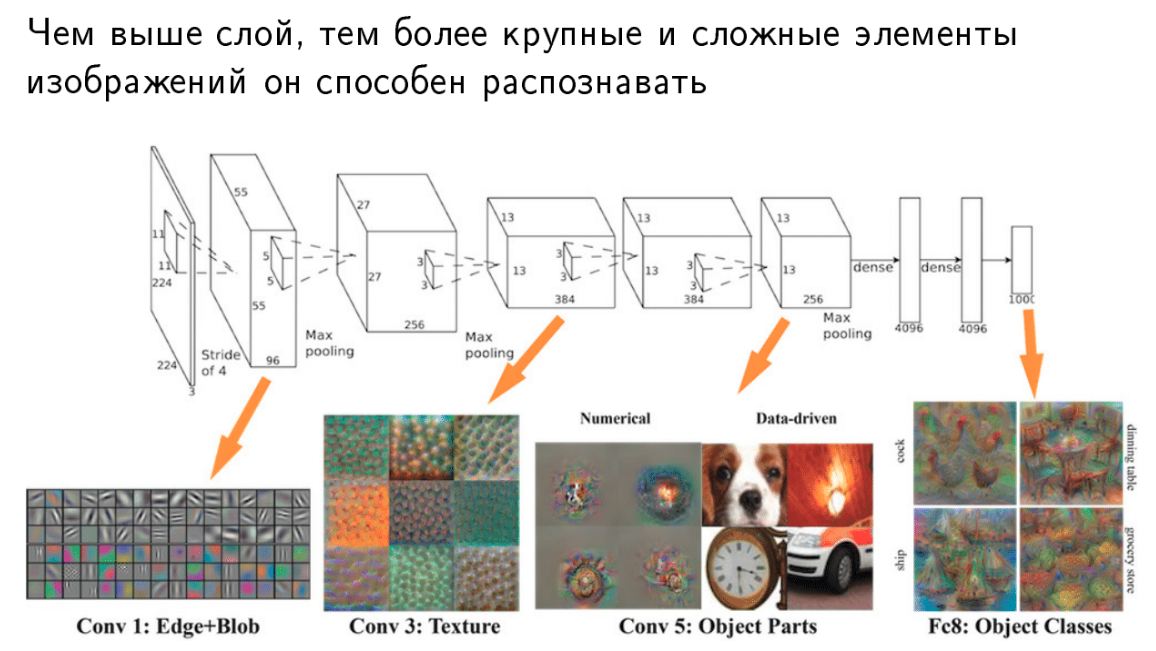

# LeNet

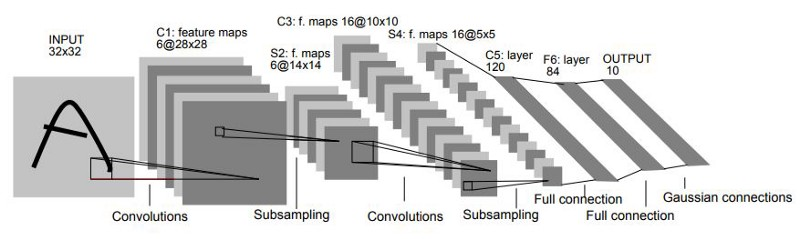

In [5]:
import torch.nn as nn

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
model = nn.Sequential(            
    # 1 * 32 * 32
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
    nn.ReLU(),
    nn.BatchNorm2d(6 * 28 * 28),
    #  6 * 28 * 28
    nn.AvgPool2d(kernel_size=2),
    # 6 * 14 *14

    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
    # 16 * 10 * 10
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2), 
    # 16 * 5 * 5
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
    # 120 * 1 * 1
    nn.Tanh(), # закончилась часть со свертками
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.Tanh(),
    nn.Linear(in_features=84, out_features=10),
    nn.Softmax()
)

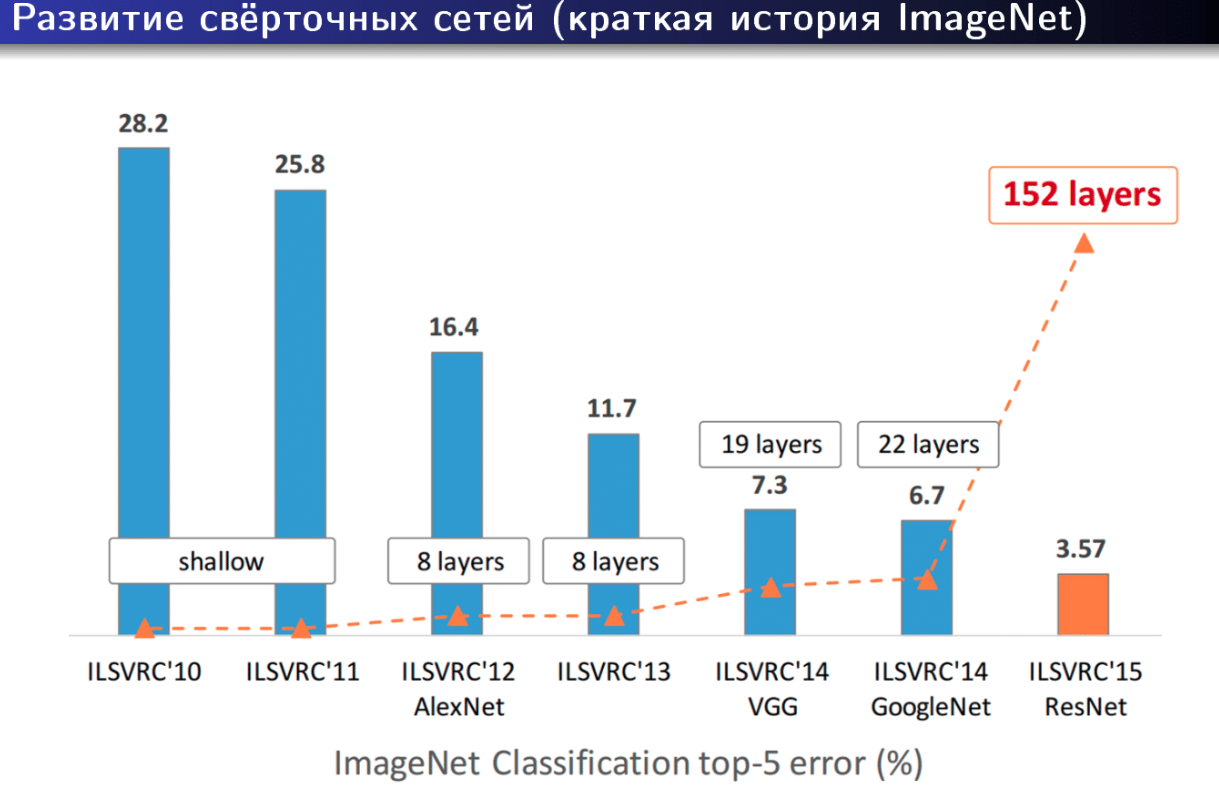

In [3]:
Image('images/result_imagenet.png', width=600)

# Dropout

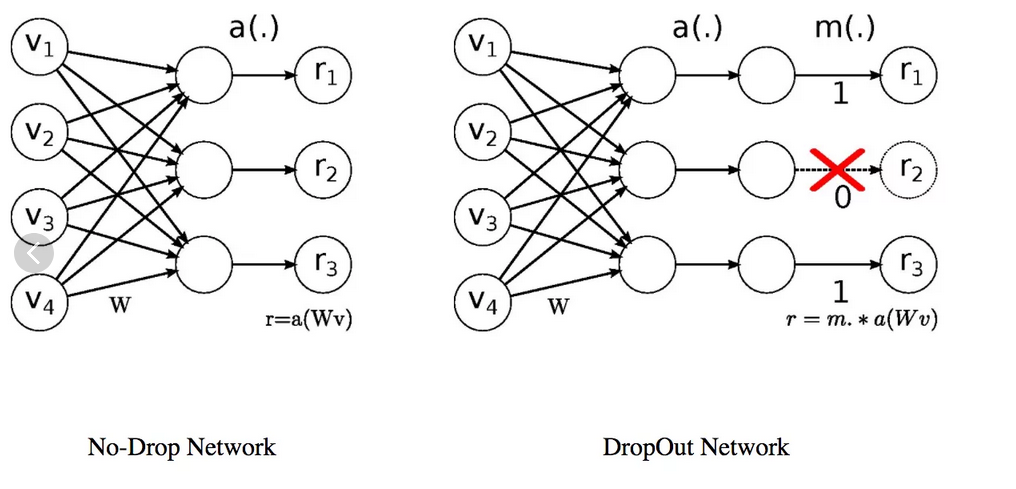

In [ ]:
nn.Dropout()

# BatchNormalization

$$BatchNorm(x) = \frac{x - \mu}  {\sqrt{\sigma + \epsilon}}$$

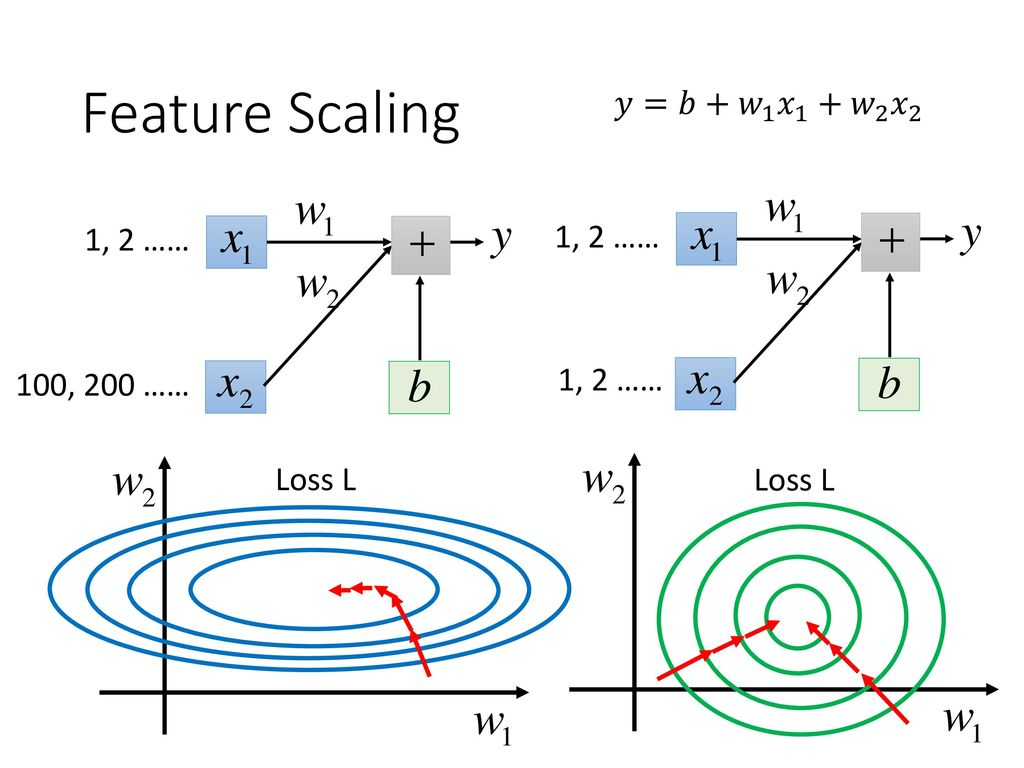

# Ссылки
* [Лекция Воронцова откуда взяты слайды](https://www.youtube.com/watch?v=oMatzWuAo2g&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=14)
* [Dropout Habr](https://habr.com/ru/company/wunderfund/blog/330814/)
* [BatchNorm Habr](https://habr.com/ru/post/309302/)

* [Визуализация сверточных слоев](https://www.machinelearningmastery.ru/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e/)